delivery_time

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [5]:
data=pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<ipython-input-9-fd8df65c5d1c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

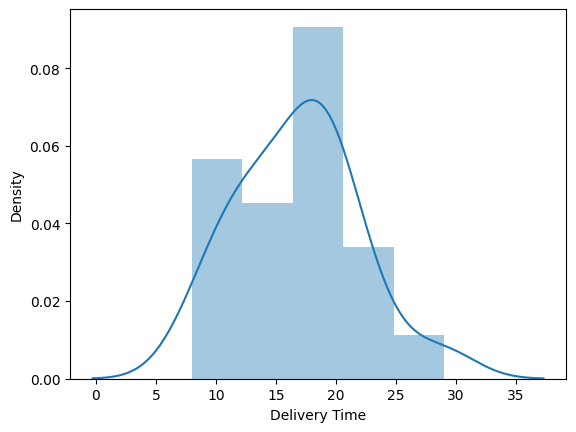

In [9]:
sns.distplot(data['Delivery Time'])

<ipython-input-10-971e7a7bfcf0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

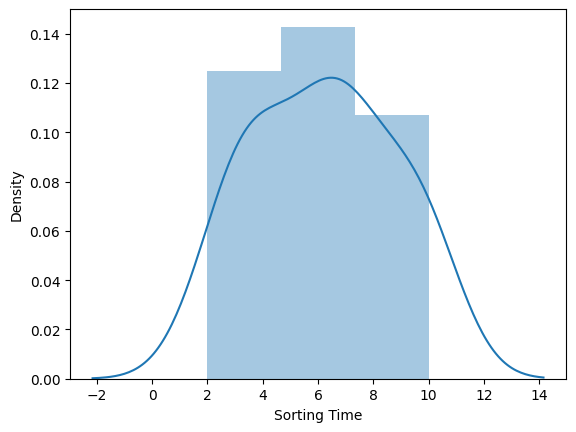

In [10]:
sns.distplot(data['Sorting Time'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['Sorting Time']],
    data['Delivery Time'],
    test_size=0.2,
    random_state=42)

In [12]:
# Apply log transformation to Sorting Time
X_train['log_SortingTime'] = np.log(X_train['Sorting Time'])
X_test['log_SortingTime'] = np.log(X_test['Sorting Time'])

In [13]:
model = LinearRegression()
model.fit(X_train[['log_SortingTime']], y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test[['log_SortingTime']])

In [15]:
y_pred

array([22.92713014, 19.32631235, 13.6767019 , 13.6767019 , 22.92713014])

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [17]:
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

MAE: 1.91
MSE: 6.39
RMSE: 2.53
R-squared: 0.08


In [20]:
import statsmodels.formula.api as smf
data=data.rename({"Delivery Time":'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)

In [21]:
model=smf.ols('Delivery_Time~Sorting_Time',data=data).fit()
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

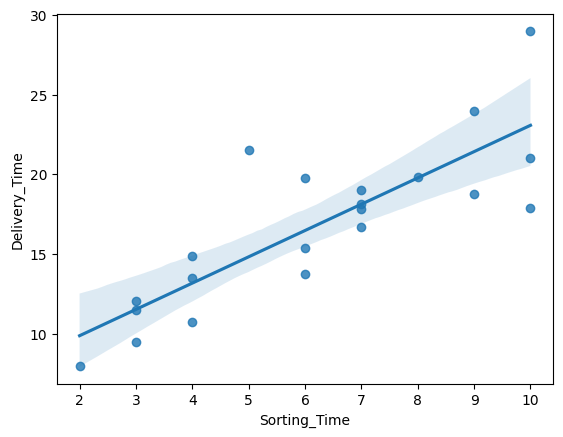

In [22]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=data)

In [23]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [24]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [26]:
newdata=pd.Series([2,4,6,8,10])
newdata

0     2
1     4
2     6
3     8
4    10
dtype: int64

In [27]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])
model.predict(data_pred)

0     9.880774
1    13.178814
2    16.476853
3    19.774893
4    23.072933
dtype: float64